# Data Exploration

- Load Data
- Univariate Analysis
    - Histogram
- Correlations

# Load Data

In [5]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [7]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preProcessing import data_preProcessing_script
from data_manipulator import DataCleaner
from data_exploration import exploration

In [10]:
df = pd.read_csv("../data/processed_incl_missing.csv")
df.head()

,game_key,campaign_id,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,eng_type,direction,adunit_sizex,adunit_sizey
0,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291,Thailand,www.wuxiaworld.com,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
1,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298,Thailand,www.wuxiaworld.com,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
2,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693,Thailand,www.prachachat.net,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
3,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188,Thailand,www.prachachat.net,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
4,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047,Thailand,www.prachachat.net,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0


# Data Information

In [11]:
preprocess = data_preProcessing_script(df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49965 entries, 0 to 49964
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   game_key                             49965 non-null  object 
 1   campaign_id                          49965 non-null  object 
 2   type                                 49965 non-null  object 
 3   width                                49965 non-null  object 
 4   height                               49965 non-null  object 
 5   creative_id                          49965 non-null  object 
 6   auction_id                           49965 non-null  object 
 7   browser_ts                           49965 non-null  object 
 8   geo_country                          49965 non-null  object 
 9   site_name                            49965 non-null  object 
 10  platform_os                          49965 non-null  int64  
 11  device_type                 

In [12]:
print('unique column values')
df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(33)

unique column values


browser_ts                             49533
auction_id                             42216
site_name                               4030
creative_id                              260
game_key                                 155
campaign_id                               39
campaign_name                             39
browser                                   26
Description                               24
Submission Date                           24
startdate                                 20
enddate                                   18
Gross Cost/Budget                         15
Net Cost                                  14
Campaign Objectives                       13
Volume Agreed                             13
Buy Rate (CPE)                            12
text_clickthr                             11
labels_engagement                         11
Serving Location(s)                       11
labels_clickthr                           11
geo_country                               10
text_engag

## Classifying catagorical and Numerican Datasets

In [16]:
# getting dataframe columns list
cols = df.columns.tolist()

In [17]:
# numerical values
num_cols = df._get_numeric_data().columns
num_cols

Index(['platform_os', 'Buy Rate (CPE)', 'Volume Agreed', 'Gross Cost/Budget',
       'Percentage', 'Net Cost', 'colors_engagement_red',
       'colors_engagement_green', 'colors_engagement_blue',
       'colors_engagement_proportion', 'colors_engagement_saturation',
       'colors_engagement_luminosity', 'colors_clickthr_red',
       'colors_clickthr_green', 'colors_clickthr_blue',
       'colors_clickthr_proportion', 'colors_clickthr_saturation',
       'colors_clickthr_luminosity', 'videosd', 'adunit_sizex',
       'adunit_sizey'],
      dtype='object')

In [18]:
# catagorical values
list(set(cols) - set(num_cols))

['campaign_name',
 'Placement(s)',
 'kpis',
 'Submission Date',
 'width',
 'type',
 'game_key',
 'height',
 'Black/white/audience list included?',
 'labels_clickthr',
 'labels_engagement',
 'direction',
 'browser',
 'enddate',
 'Agency Fee',
 'text_engagement',
 'campaign_id',
 'startdate',
 'auction_id',
 'device_type',
 'eng_type',
 'Campaign Objectives',
 'browser_ts',
 'creative_id',
 'text_clickthr',
 'Serving Location(s)',
 'geo_country',
 'Cost Centre',
 'site_name',
 'currency',
 'Description']

# Univariate Analysis

### kpis

In [19]:
# grouping by experiment and its count
experiment_groups = df.groupby(['kpis']).agg({'kpis': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,kpis,count
0,VTR\nCTR\nEngagement Rate,18334
1,Engagement Rate,15775
2,CTR\nEngagement Rate,15136
3,CTR\nConversion Rate,255
4,VTR\nCTR\nCompletion Rate\nEngagement Rate,178


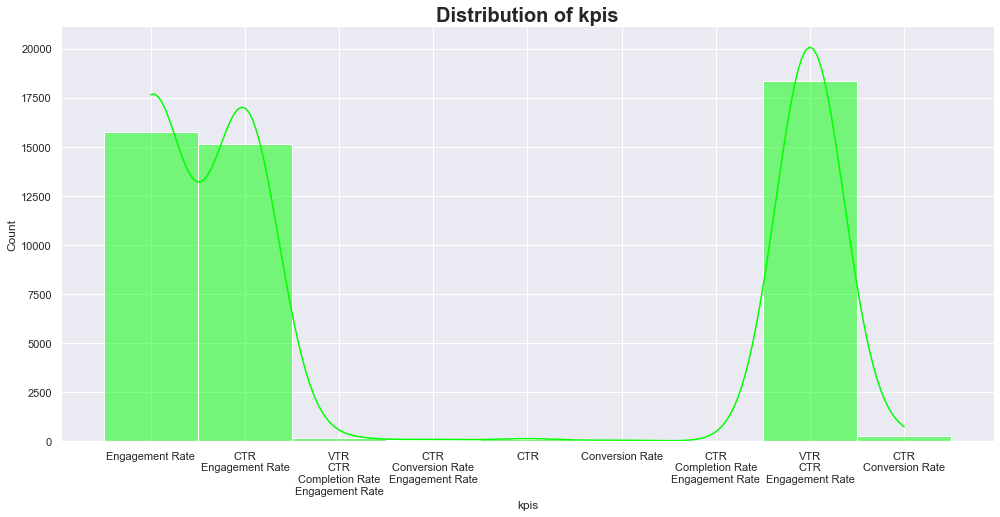

In [20]:
# histogram visual
exploration = exploration()
fig = exploration.plot_hist(df,'kpis','lime')

## type

In [21]:
# grouping by experiment and its count
experiment_groups = df.groupby(['type']).agg({'type': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,type,count
0,impression,44412
1,first_dropped,4004
2,click-through-event,1549


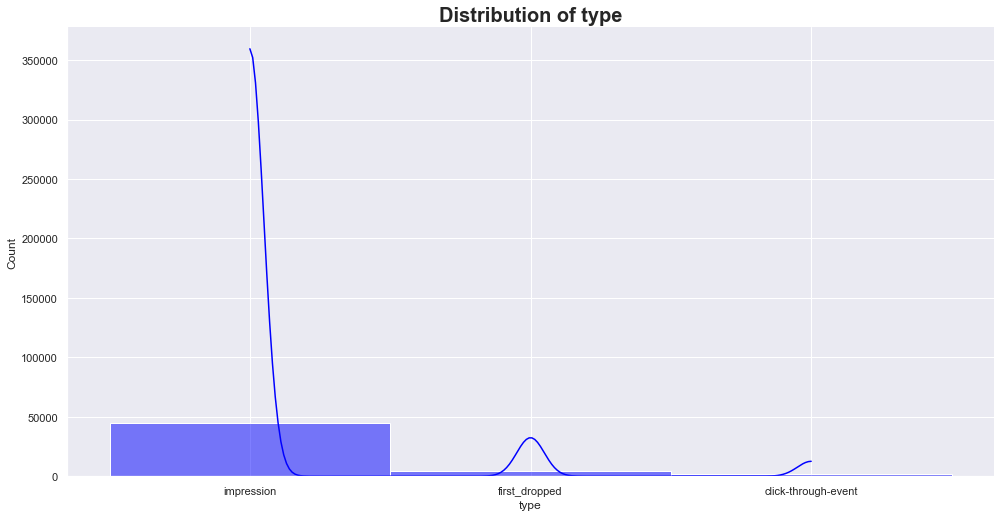

In [24]:
# histogram visual
fig = exploration.plot_hist(df,'type','blue')

## Directions

In [29]:
# grouping by experiment and its count
experiment_groups = df.groupby(['direction']).agg({'direction': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,direction,count
0,up,49939
1,no direction,14
2,right,12


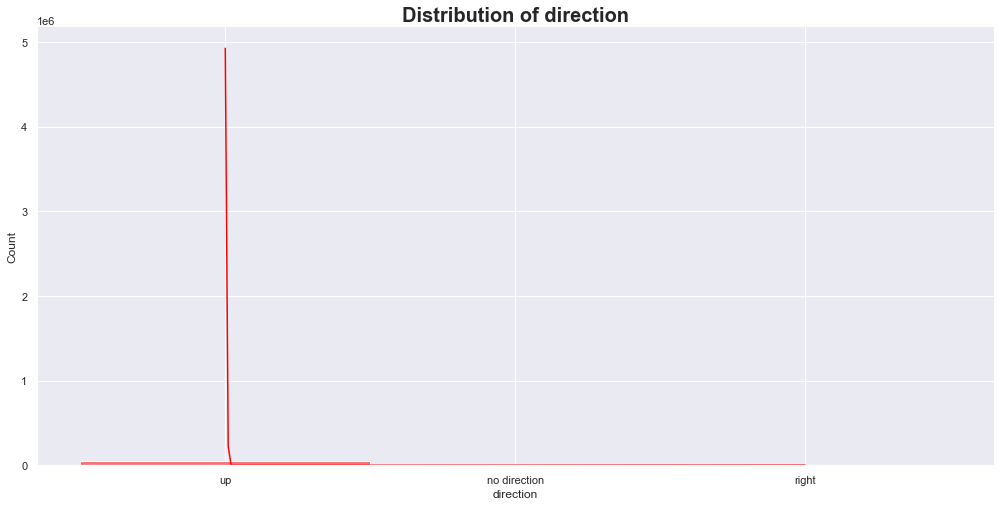

In [30]:
# histogram visual
fig = exploration.plot_hist(df,'direction','red')

## Browser

In [31]:
# grouping by experiment and its count
experiment_groups = df.groupby(['browser']).agg({'browser': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,browser,count
0,Chrome Mobile,21337
1,Mobile Safari,7270
2,Facebook,5819
3,Mobile Safari UI/WKWebView,4150
4,Chrome Mobile WebView,2978


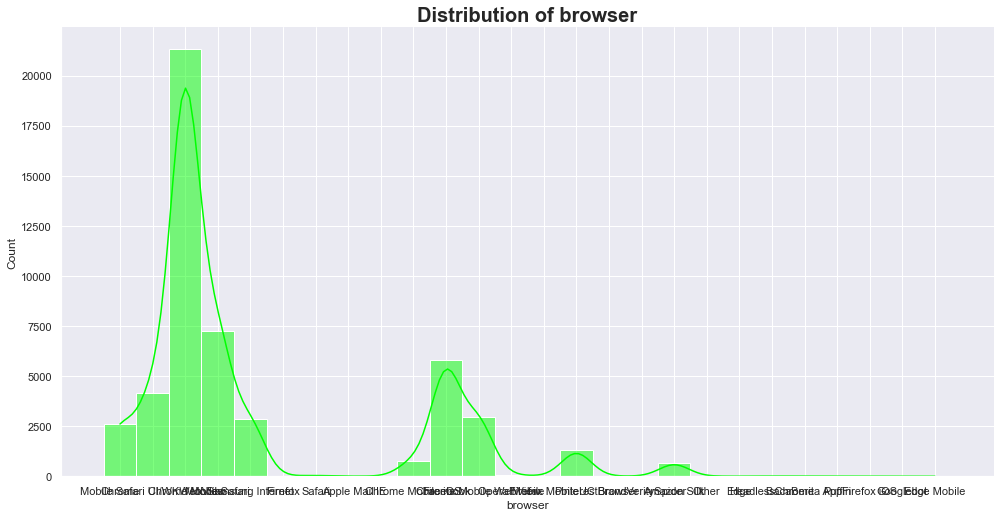

In [32]:
# histogram visual
fig = exploration.plot_hist(df,'browser','lime')

## Device Type

In [33]:
# grouping by experiment and its count
experiment_groups = df.groupby(['device_type']).agg({'device_type': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,device_type,count
0,Mobile,46088
1,Tablet,3666
2,PC,210
3,Other,1


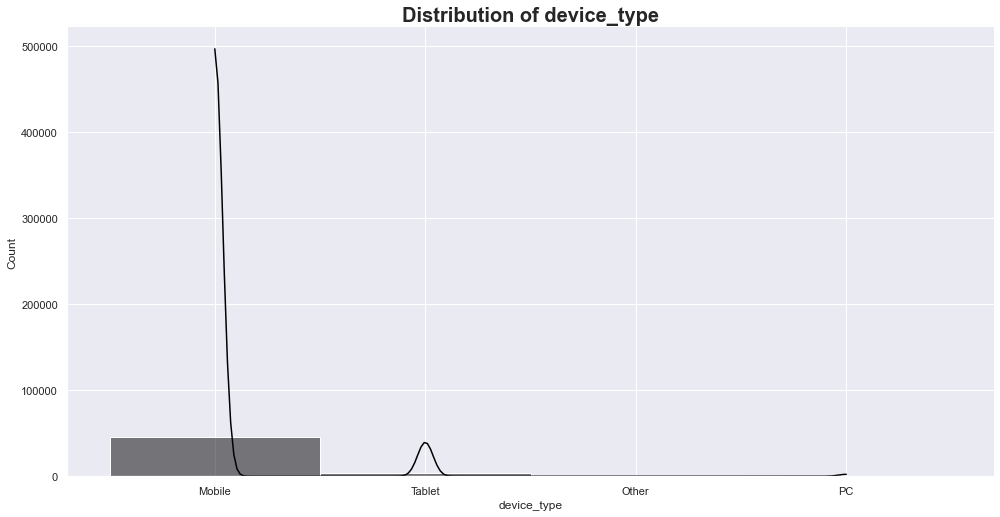

In [34]:
# histogram visual
fig = exploration.plot_hist(df,'device_type','black')

In [ ]:
geo_country

In [35]:
# grouping by experiment and its count
experiment_groups = df.groupby(['geo_country']).agg({'geo_country': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,geo_country,count
0,United States,38428
1,Singapore,7014
2,Australia,3656
3,South Korea,397
4,France,236


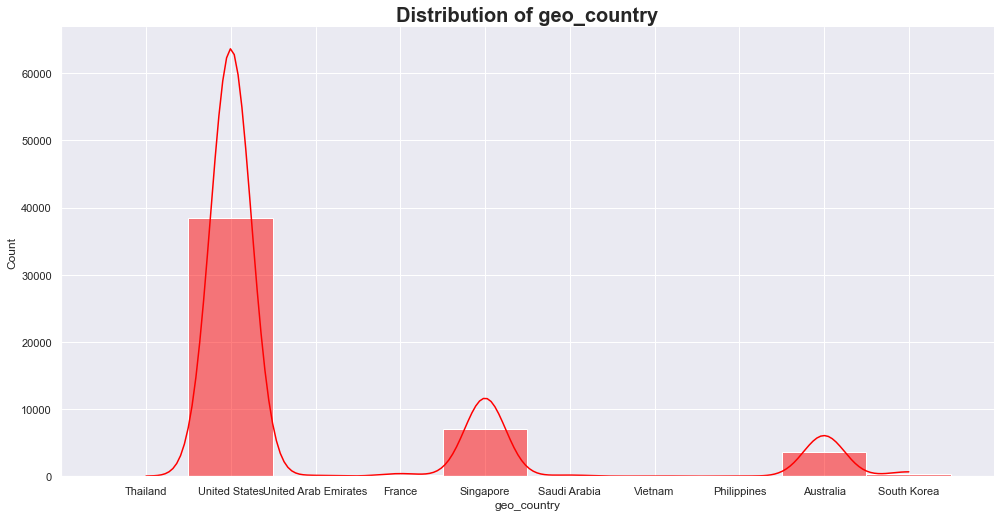

In [36]:
# histogram visual
fig = exploration.plot_hist(df,'geo_country','red')

## Serving Location(s)

In [41]:
# grouping by experiment and its count
experiment_groups = df.groupby(['Serving Location(s)']).agg({'Serving Location(s)': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,Serving Location(s),count
0,US National,24599
1,Singapore,10600
2,"NY, Boston, Philadelphia",8010
3,US,5386
4,Korea,397


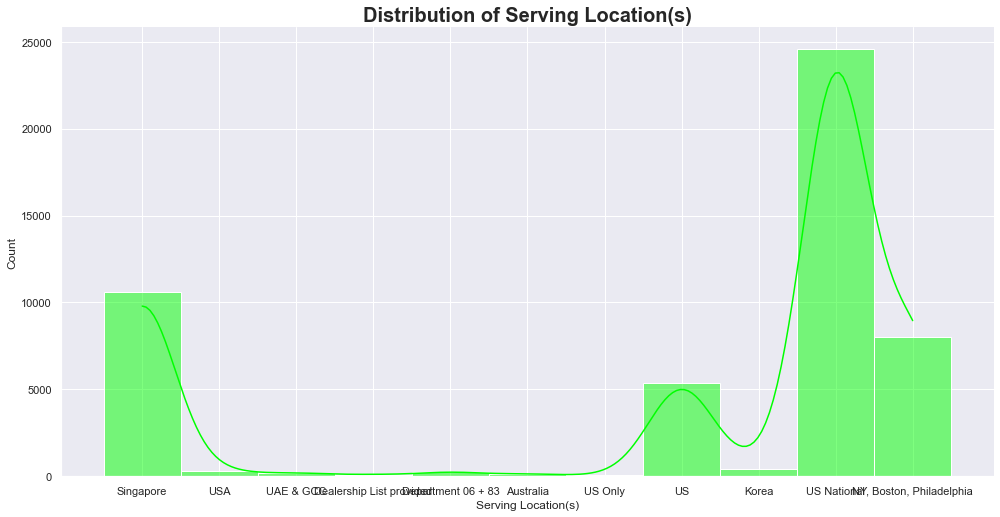

In [43]:
# histogram visual
fig = exploration.plot_hist(df,'Serving Location(s)','lime')

## platform_os

In [44]:
# grouping by experiment and its count
experiment_groups = df.groupby(['platform_os']).agg({'platform_os': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,platform_os,count
0,6,37486
1,5,12212
2,2,180
3,4,33
4,3,27


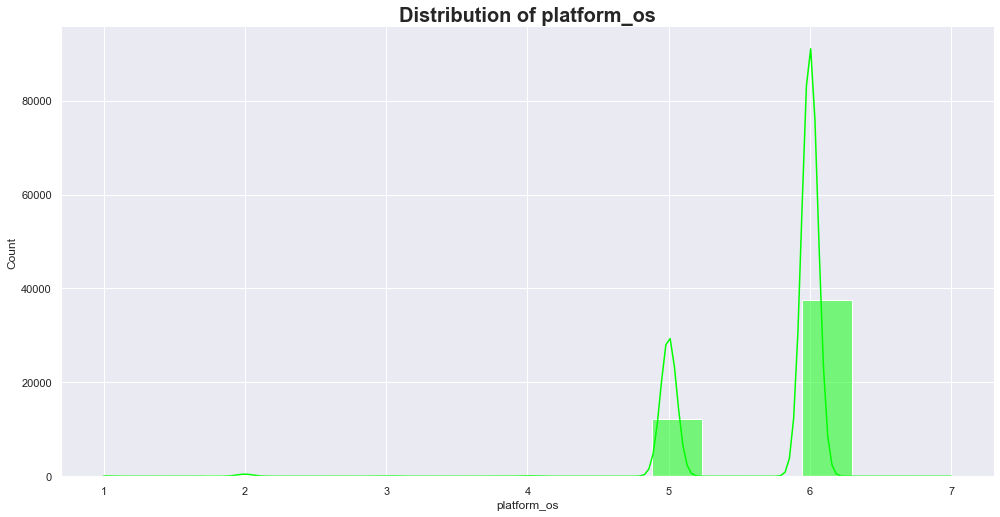

In [45]:
# histogram visual
fig = exploration.plot_hist(df,'platform_os','lime')

In [ ]:
'videosd', 'adunit_sizex',
       'adunit_sizey'],

## videosd

In [46]:
# grouping by experiment and its count
experiment_groups = df.groupby(['videosd']).agg({'videosd': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,videosd,count
0,0.0,49940
1,1.0,25


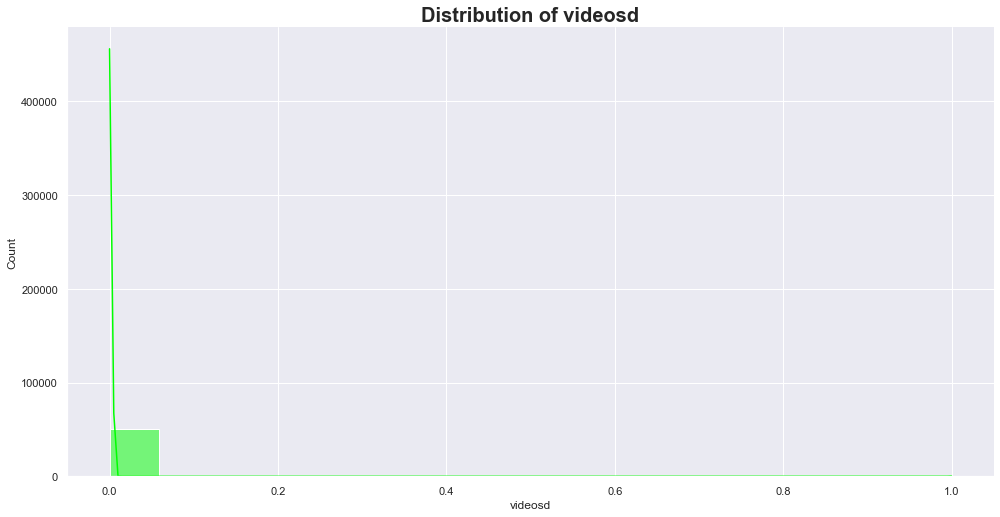

In [47]:
# histogram visual
fig = exploration.plot_hist(df,'videosd','lime')

## Gross Cost/Budget

In [50]:
# grouping by experiment and its count
experiment_groups = df.groupby(['Gross Cost/Budget']).agg({'Gross Cost/Budget': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,Gross Cost/Budget,count
0,50000.00,15120
1,212471.60,8010
2,25411.68,7436
3,0.00,6821
4,75000.00,4287


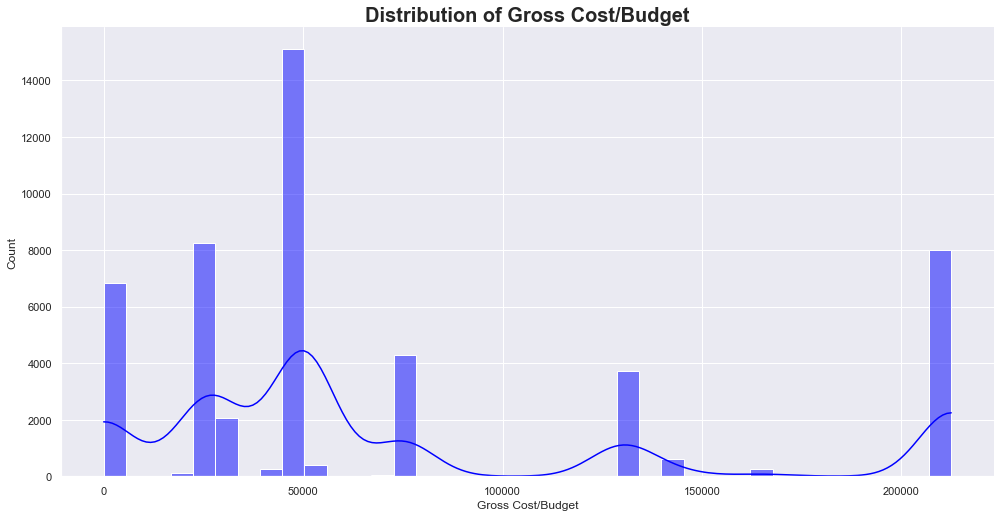

In [51]:
# histogram visual
fig = exploration.plot_hist(df,'Gross Cost/Budget','blue')

# Correlations

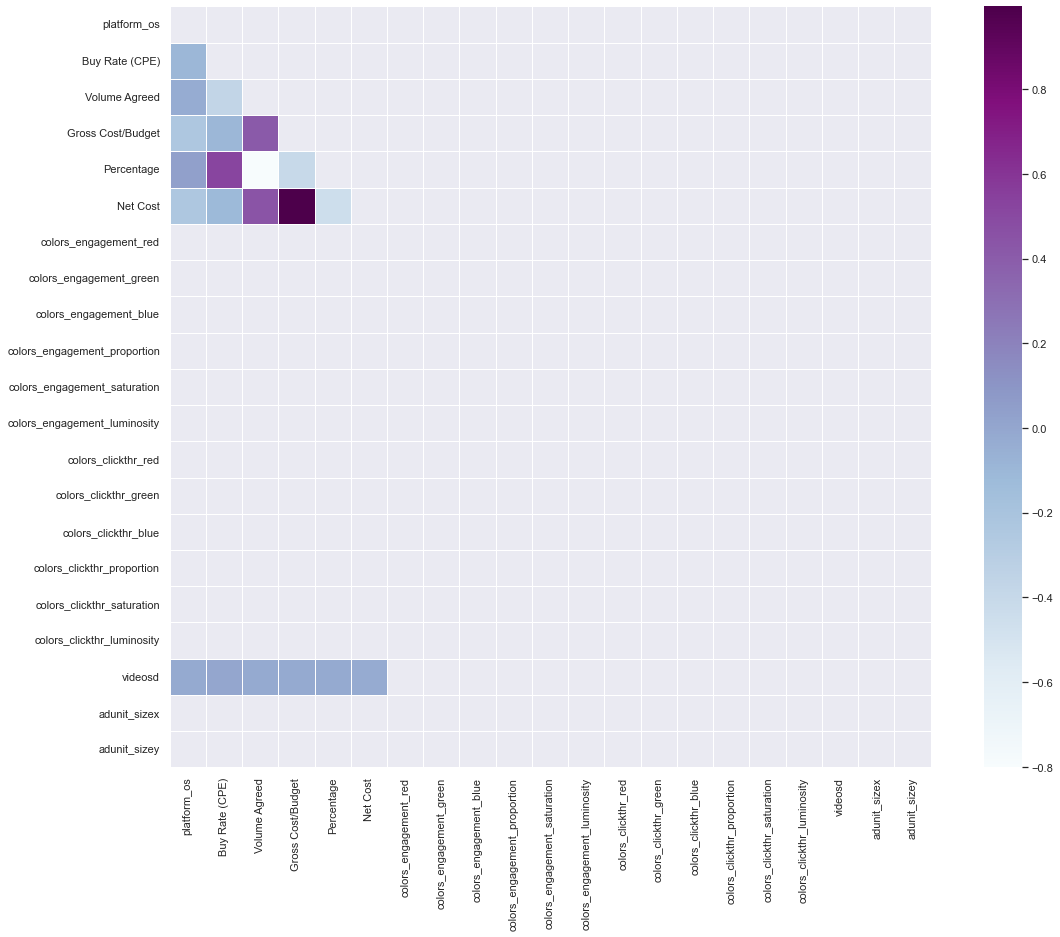

In [52]:
# Compute the correlation matrix 
corr_all = df.drop('kpis', axis = 1).corr()
# upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (19, 14))
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

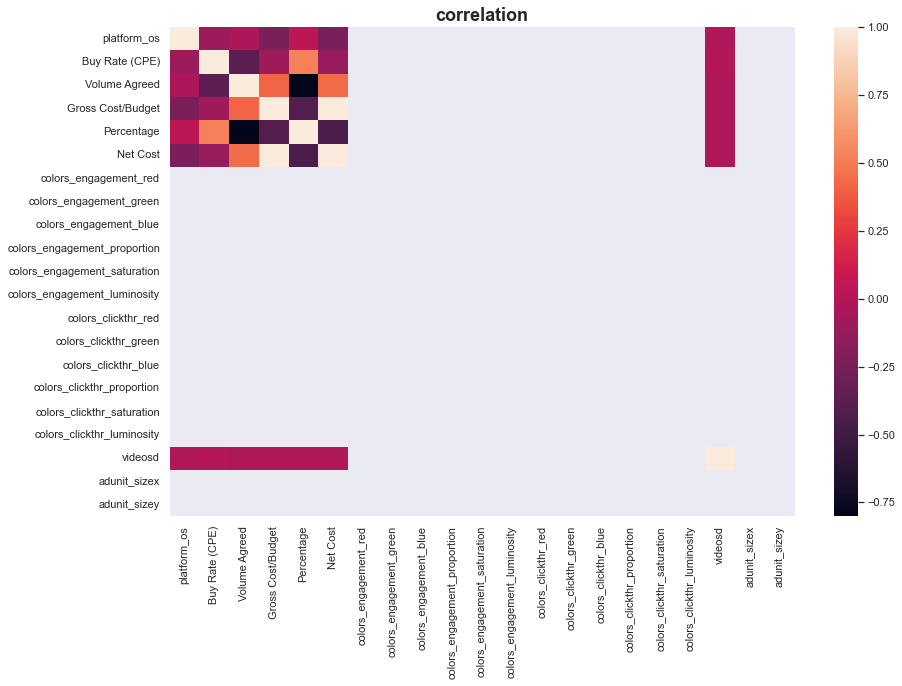

In [53]:
exploration.plot_heatmap_from_correlation(df.corr(), "correlation")